In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

pd.set_option('display.max_columns', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data: DB1(2020.5.17).xlsx


In [ ]:
#data_jaun = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'digestive(jaundice)')
#data_hemate = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'hematemesis(digestive)')
#data_Folie_Nerve = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'Folie_Nerve')
#data_musculoskeletal = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'musculoskeletal')
#data_kidney = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'kidney')
#data_respiratory = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'respiratory')
#data_circulator1 = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'circulator1')
#data_circulator2 = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'Circulator2')
#data_para = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'Para_Female_Child')
#data_digestive = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'digestive')

In [ ]:
DATA_IN_PATH = '/content/drive/MyDrive/캡스톤/version_6/version_6/'

In [ ]:
data_jaun = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'digestive(jaundice)')
data_hemate = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'hematemesis(digestive)')
#data_Folie_Nerve = pd.read_excel('DB1(2020.5.17).xlsx', sheet_name = 'Folie_Nerve')
data_musculoskeletal = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'musculoskeletal')
data_kidney = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'kidney')
data_respiratory = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'respiratory')
data_circulator1 = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'circulator1')
data_circulator2 = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'Circulator2')
data_para = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'Para_Female_Child')
data_digestive = pd.read_excel(DATA_IN_PATH+'DB1(2020.5.17)_add_less_5.xlsx', sheet_name = 'digestive')
#others = pd.read_excel('결측치db.xls', sheet_name='Sheet2')

# 1. Preprocessing

## 0) Select columns and fill diseases

In [ ]:
def organize_data(df):
  df.columns = df.iloc[0]
  df = df[1:]
  df = df.iloc[:, 3:]
  df = df[['level2', 'Chief complaint', 'Onset', 'Location']]
  #df = df[['level2', 'Chief complaint', 'Onset']]
  df['level2'] = df['level2'].fillna(method='ffill')

  return df

In [ ]:
data_digestive = organize_data(data_digestive)
data_musculoskeletal = organize_data(data_musculoskeletal)
data_kidney = organize_data(data_kidney)
data_respiratory = organize_data(data_respiratory)
data_para = organize_data(data_para)
#data_Folie_Nerve = organize_data(data_Folie_Nerve)
data_circulator1 = organize_data(data_circulator1)
data_hemate = organize_data(data_hemate)
data_jaun = organize_data(data_jaun)

data_circulator2 = data_circulator2[['챕터', 'Chief complaint', 'Onset', 'Location']]
#data_circulator2 = data_circulator2[['챕터', 'Chief complaint', 'Onset']]
data_circulator2['챕터'] = data_circulator2['챕터'].fillna(method='ffill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
print(data_digestive.shape)
print(data_jaun.shape)
print(data_hemate.shape)
print(data_musculoskeletal.shape)
print(data_kidney.shape)
print(data_respiratory.shape)
print(data_para.shape)
#print(data_Folie_Nerve.shape)
print(data_circulator1.shape)
print(data_circulator2.shape)

(421, 4)
(440, 4)
(360, 4)
(205, 4)
(246, 4)
(205, 4)
(355, 4)
(305, 4)
(218, 4)


In [ ]:
data_circulator2.columns = data_circulator1.columns

data = pd.concat([data_digestive, data_musculoskeletal, data_kidney,
                  data_respiratory, data_circulator1, #data_Folie_Nerve,
                  data_circulator2, data_para, data_jaun, data_hemate], axis=0)
data.sample()

,level2,Chief complaint,Onset,Location
69,Hematemesis,토에서 피가 나와요,2일 전,-


In [ ]:
data = data.dropna(thresh=2)
data.shape

(2363, 4)

## 1) Check Target Data, Disease

In [ ]:
data['level2'].value_counts()

Jaundice                            495
Hematemesis                         400
Emmeniopathy/Dysmenorrhea           100
Acute Abdominal Pain                 95
Arthrodynia                          75
Mastalgia/Breast Lump                70
Chest Pain                           66
Blackout                             65
Emesis                               60
Dysuria                              60
Dyspnea                              60
Cough                                60
Red Urine                            60
Dyspepsia/Chronic Abdominal Pain     55
Palpitation                          55
Dyslipidemia                         53
Oliguresis                           50
Skin Rash                            50
Hemoptysis                           50
Cervicodynia                         50
Diarrhea                             45
Hypertension                         43
Polyuria                             40
Rhinorrhea/Nasal Stuffiness          40
Hematochezia                         40


In [ ]:
data = data[data['level2'] != 'Dyslipidemia'] # Drop 이상지질혈증
data.reset_index(inplace=True, drop=True)

In [ ]:
len(data['level2'].unique())

28

### Organize differently expressed diseases to the same expression diseases

In [ ]:
level2_kor = pd.read_excel(DATA_IN_PATH+'ver6_new_words.xlsx', sheet_name = 'level2')
level2_kor = level2_kor[['Level 2', '번역']]
level2_kor = level2_kor.dropna()

level2_kor.columns = ['level2', '번역']
level2_kor.head()

,level2,번역
0,Acute Abdominal Pain,급성 복통
1,Dyspepsia/Chronic Abdominal Pain,소화불량/만성 복통
2,Hematemesis,토혈
3,Hematochezia,혈변
4,Emesis,구토


In [ ]:
print(level2_kor.shape)

(41, 2)


In [ ]:
data = pd.merge(data, level2_kor, how='left',on='level2')
#data2.reset_index(drop=True, inplace=True)

data['번역'].fillna(data['level2'], inplace=True)
data['level2'] = data['번역']
data.drop('번역', axis=1, inplace=True)
data.sample()

,level2,Chief complaint,Onset,Location
1062,호흡곤란,숨쉬기 힘들어요,1일전,-


In [ ]:
data = pd.merge(data, level2_kor, how='left',on='level2')
#data2.reset_index(drop=True, inplace=True)

data['번역'].fillna(data['level2'], inplace=True)
data['level2'] = data['번역']
data.drop('번역', axis=1, inplace=True)
data.sample()

,level2,Chief complaint,Onset,Location
520,목 통증/허리 통증,허리 아파요,3일전,허리


In [ ]:
len(data['level2'].unique())

27

In [ ]:
pd.DataFrame(data['level2'].value_counts()).to_csv('aa.csv', encoding='utf-8')

In [ ]:
a = pd.DataFrame(data['level2'].value_counts().reset_index().values, columns=["disease", "counts"])
a['disease']

0             황달
1             토혈
2           호흡곤란
3       월경이상/월경통
4          급성 복통
5     목 통증/허리 통증
6          관절 통증
7       유방통/유방덩이
8           가슴통증
9             실신
10            기침
11         배뇨 이상
12        붉은색 소변
13            구토
14    소화불량/만성 복통
15          두근거림
16            핍뇨
17            객혈
18          피부발진
19            설사
20           고혈압
21        콧물/코막힘
22            혈변
23           다뇨증
24         소변찔끔증
25         질 분비물
26            변비
Name: disease, dtype: object

In [ ]:
b=[]
b.extend(['황달', '토혈','호흡곤란', '월경이상/월경통','급성 복통','가슴통증', '목 통증/허리 통증', '관절 통증', '유방통/유방덩이', 
         '실신','배뇨 이상','구토', '기침', '붉은색 소변','소화불량/만성 복통', '두근거림', '핍뇨', '객혈', '피부발진', '설사', '콧물/코막힘', '다뇨증', '혈변' , '고혈압','소변찔끔증', '변비', '질 분비물'])

a = pd.DataFrame({'disease' : b})
a

,disease
0,황달
1,토혈
2,호흡곤란
3,월경이상/월경통
4,급성 복통
5,가슴통증
6,목 통증/허리 통증
7,관절 통증
8,유방통/유방덩이
9,실신


In [ ]:
a['disease']

0             황달
1             토혈
2           호흡곤란
3       월경이상/월경통
4          급성 복통
5           가슴통증
6     목 통증/허리 통증
7          관절 통증
8       유방통/유방덩이
9             실신
10         배뇨 이상
11            구토
12            기침
13        붉은색 소변
14    소화불량/만성 복통
15          두근거림
16            핍뇨
17            객혈
18          피부발진
19            설사
20        콧물/코막힘
21           다뇨증
22            혈변
23           고혈압
24         소변찔끔증
25            변비
26         질 분비물
Name: disease, dtype: object

## 2) Change Nan

In [ ]:
data = data.fillna('-')

In [ ]:
def to_nan(x):
  if(x == '-'):
    x = ''
  elif(x == '아니오'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '몰라요'):
    x = ''
  elif(x == '모릅니다'):
    x = ''
  elif(x == '모름'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '없습니다'):
    x = ''
  elif(x == '없어요'):
    x = ''
  elif(x == '없음'):
    x = ''
  elif(x == '.'):
    x = ''
  return x

In [ ]:
for i in range(len(data.columns)):
    data[data.columns[i]] = data.apply(lambda x : to_nan(x[data.columns[i]]) , axis = 1 )

## 3) Make a sentence

In [ ]:
data['All'] = data['Chief complaint'] + '. ' + data['Onset'] + '. ' + data['Location']
data.sample()

,level2,Chief complaint,Onset,Location,All
284,구토,구토를 했어요,1달전,,구토를 했어요. 1달전.


## 4) Check spelling

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-v6p84180
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-v6p84180
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=ac428fc29e3b3f5711cb4933dff64497332990e5f3661956aade89ffeed7c4e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-1dmdqgfi/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

In [ ]:
from hanspell import spell_checker
from tqdm.notebook import tqdm

data['checked'] = ''
for i in tqdm(range(len(data))):
  data['checked'][i] = spell_checker.check(data['All'][i]).as_dict()['checked'] 
data

  0%|          | 0/2370 [00:00<?, ?it/s]

,level2,Chief complaint,Onset,Location,All,checked
0,급성 복통,배가 아파요,1일전,명치 부위,배가 아파요. 1일전. 명치 부위,배가 아파요. 1일 전. 명치 부위
1,급성 복통,갑자기 배가 너무 아파요,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,갑자기 배가 너무 아파요. 오늘 새벽. 명치에서 시작해 현재 복부 전체에 통증,갑자기 배가 너무 아파요. 오늘 새벽. 명치에서 시작해 현재 복부 전체에 통증
2,급성 복통,속이 쓰려요,1달전,명치 부위,속이 쓰려요. 1달전. 명치 부위,속이 쓰려요. 1달 전. 명치 부위
3,급성 복통,속이 쓰려요,2달전,명치부위,속이 쓰려요. 2달전. 명치부위,속이 쓰려요. 2달 전. 명치 부위
4,급성 복통,배가 아파요,1시간전,명치부위,배가 아파요. 1시간전. 명치부위,배가 아파요. 1시간 전. 명치 부위
...,...,...,...,...,...,...
2365,토혈,피를 토했어요,,,피를 토했어요. .,피를 토했어요. .
2366,토혈,피를 토했어요,,,피를 토했어요. .,피를 토했어요. .
2367,토혈,피를 토했어요,,,피를 토했어요. .,피를 토했어요. .
2368,토혈,피 토했어요,,,피 토했어요. .,피 토했어요. .


## 5) Erase stopwords using konlpy

In [ ]:
!pip install konlpy
import konlpy.tag
okt = konlpy.tag.Okt() # 객체 생성

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 16.3 MB/s 


In [ ]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '을',
             '를', '으로', '자', '에', '와', '하다', '요', '다', '.', ',']

In [ ]:
import re

def erase_stopwords(text):
  X_train =[]
  temp_x = okt.morphs(text, stem=True)
  #print(temp_x)
  temp_x = [word for word in temp_x if not word in stopwords]
  temp_x = re.findall(r'\w+', str(temp_x))
  X_train.append(temp_x)
  #print(X_train)
  temp_x = ' '.join(map(str, X_train))
  
  return ' '.join(re.findall(r'\w+', str(temp_x)))

In [ ]:
data['checked'] = data.apply(lambda x : erase_stopwords(x['checked']) , axis = 1 )

# 2. Generate feature
https://datascience.stackexchange.com/questions/74688/how-to-use-multiple-text-features-for-nlp-classifier

In [ ]:
data_level2 = data.pop('level2')

In [ ]:
from sklearn.model_selection import train_test_split

ori_X_train, ori_X_test, ori_y_train, ori_y_test = train_test_split(data, data_level2, random_state = 0)

In [ ]:
ori_X_train

,Chief complaint,Onset,Location,All,checked
596,피부 발진,3개월전,피부,피부 발진. 3개월전. 피부,피부 발진 3 개월 전 피부
77,배가 아파요,2일전,우측복부,배가 아파요 . 2일전. 우측복부,배 아프다 2일 전 우측 복부
2156,피를 토했어요,6시간 전,,피를 토했어요. 6시간 전.,피 토 6시간 전
393,얼굴이 노래요,2일전,,얼굴이 노래요. 2일전.,얼굴 노래 2일 전
2180,피 토했어요,5시간 전,,피 토했어요. 5시간 전.,피 토 5시간 전
...,...,...,...,...,...
1033,걸으면 숨이 많이 차요,3달전,,걸으면 숨이 많이 차요. 3달전.,걸다 숨 많이 차요 3 달 전
1731,얼굴이 노래요,한달전,"얼굴, 사지","얼굴이 노래요. 한달전. 얼굴, 사지",얼굴 노래 달 전 얼굴 사지
763,"""소변이 붉어요""",어제 아침,,"""소변이 붉어요"". 어제 아침.",소변 붉다 어제 아침
835,"""자주 소변이 새요""",7년 전부터 조금씩 서서히 발생,,"""자주 소변이 새요"". 7년 전부터 조금씩 서서히 발생.",자주 소변 새 7년 전 부터 조금씩 서서히 발생


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(ori_X_train['checked'])

# for test
X_test_tfidf = vectorizer.transform(ori_X_test['checked'])

In [ ]:
data_level2.value_counts()

황달            495
토혈            400
호흡곤란          120
월경이상/월경통      100
급성 복통          95
목 통증/허리 통증     80
관절 통증          75
유방통/유방덩이       70
가슴통증           66
실신             65
기침             60
배뇨 이상          60
붉은색 소변         60
구토             60
소화불량/만성 복통     55
두근거림           55
핍뇨             50
객혈             50
피부발진           50
설사             45
고혈압            43
콧물/코막힘         40
혈변             40
다뇨증            40
소변찔끔증          36
질 분비물          30
변비             30
Name: level2, dtype: int64

In [ ]:
data

,Chief complaint,Onset,Location,All,checked
0,배가 아파요,1일전,명치 부위,배가 아파요. 1일전. 명치 부위,배 아프다 1일 전 명치 부위
1,갑자기 배가 너무 아파요,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,갑자기 배가 너무 아파요. 오늘 새벽. 명치에서 시작해 현재 복부 전체에 통증,갑자기 배 너무 아프다 오늘 새벽 명치 에서 시작 현재 복부 전체 통증
2,속이 쓰려요,1달전,명치 부위,속이 쓰려요. 1달전. 명치 부위,속이다 쓰리다 1 달 전 명치 부위
3,속이 쓰려요,2달전,명치부위,속이 쓰려요. 2달전. 명치부위,속이다 쓰리다 2 달 전 명치 부위
4,배가 아파요,1시간전,명치부위,배가 아파요. 1시간전. 명치부위,배 아프다 1시간 전 명치 부위
...,...,...,...,...,...
2365,피를 토했어요,,,피를 토했어요. .,피 토
2366,피를 토했어요,,,피를 토했어요. .,피 토
2367,피를 토했어요,,,피를 토했어요. .,피 토
2368,피 토했어요,,,피 토했어요. .,피 토


In [ ]:
data_level2

0       급성 복통
1       급성 복통
2       급성 복통
3       급성 복통
4       급성 복통
        ...  
2365       토혈
2366       토혈
2367       토혈
2368       토혈
2369       토혈
Name: level2, Length: 2370, dtype: object

In [ ]:
data['level2']=data_level2

In [ ]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmss10',
 'STIXSizeOneSym',
 'cmb10',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif',
 'cmex10',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmmi10',
 'cmtt10',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmr10',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Serif',
 'Humor Sans',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Ser

In [ ]:
font_list[-1]

'Liberation Sans'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_

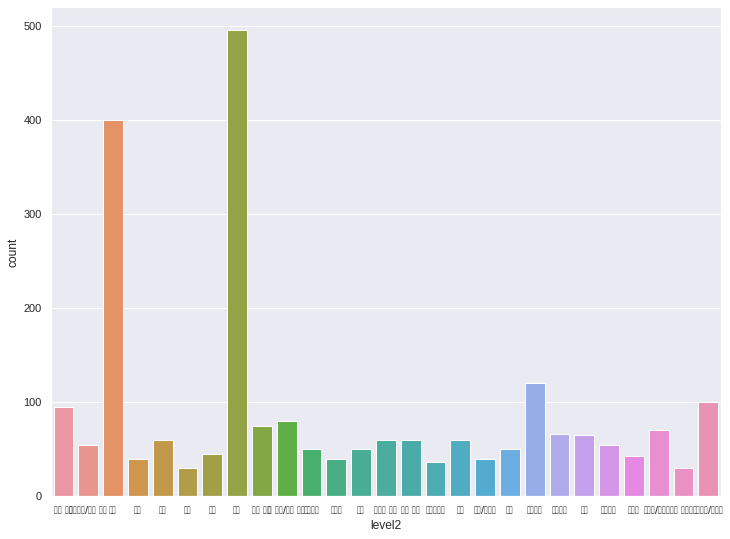

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fm.get_fontconfig_fonts()
font_location = '/Library/Fonts/NanumBarunGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
sns.countplot(x="level2", data=data)
plt.show()

# Model

In [ ]:
cd /content/drive/MyDrive/초메디신 인턴십/은

/content/drive/.shortcut-targets-by-id/1h6KaI8An6ZKLlp8wUdPJNrOAzZ8Wal3r/초메디신 인턴십/은


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/캡스톤/최종/level2/2nd_Fill_level2_Before_konlpy.csv')

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.head()

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50s,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 퍼지는 통증(#), 등으로 퍼짐,",", 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (...","자세에 따른 변화(#), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",없음,없음,"술(#), 1주일 6~7번, 하루 소주 2~3병, 담배(#), 30갑년, 식사 , ...",없음,없음,NaN,없음,digestive,27.681661,과체중,배가 아파요. 50s. 남자. 1일 전. 명치 부위. 지속. 심해짐. 이전에도 3차...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30s,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",NaN,없음,없음,없음,digestive,25.711662,과체중,갑자기 배가 너무 아파요. 30s. 남자. 오늘 새벽. 명치에서 시작해 현재 복부 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70s,160,48,1달전,명치 부위,지속,심해짐,없음,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,없음,관절염약 복용중,없음,없음,없음,"고혈압(#), 당뇨 (#),",없음,digestive,18.750000,저체중,속이 쓰려요. 70s. 여자. 1달 전. 명치 부위. 지속. 심해짐. 없음. 속이 ...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10s,160,58,2달전,명치부위,지속,심해짐,없음,"명치부위 누르면 아픔, 속쓰림",구토,없음,없음,철분제,없음,없음,없음,없음,없음,digestive,22.656250,정상,속이 쓰려요. 10s. 남자. 2달 전. 명치 부위. 지속. 심해짐. 없음. 명치 ...
4,급성 복통,소화성 궤양,배가 아파요,남자,60s,170,65,1시간전,명치부위,지속,심해짐,없음,명치 부위가 아프고 쓰림,없음,없음,없음,고혈압약,5년전 알코올 중독,없음,없음,"고혈압(#),",없음,digestive,22.491349,정상,배가 아파요. 60s. 남자. 1시간 전. 명치 부위. 지속. 심해짐. 없음. 명치...


In [ ]:
df = data[['Chief complaint', 'Onset', 'Location','Sex','level2']]
df.head()

,Chief complaint,Onset,Location,Sex,level2
0,배가 아파요,1일전,명치 부위,남자,급성 복통
1,갑자기 배가 너무 아파요,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,남자,급성 복통
2,속이 쓰려요,1달전,명치 부위,여자,급성 복통
3,속이 쓰려요,2달전,명치부위,남자,급성 복통
4,배가 아파요,1시간전,명치부위,남자,급성 복통


In [ ]:
X_female = df[df['Sex']=='여자']
X_female = X_female.reset_index(drop=True)
y_female = X_female['level2']

X_female.drop(['Sex', 'level2'], axis=1, inplace=True)

In [ ]:
X_female.head()

,Chief complaint,Onset,Location
0,속이 쓰려요,1달전,명치 부위
1,배가 아파요,30분전,배꼽주변
2,속이 쓰려요,4시간전,없음
3,속이 쓰려요,1주전,배꼽주변
4,속이 쓰려요,1달전,없음


In [ ]:
y_female.head()

0    급성 복통
1    급성 복통
2    급성 복통
3    급성 복통
4    급성 복통
Name: level2, dtype: object

In [ ]:
# 데이터를 다 합친 column 만들기
X_female['sent'] = '0'

sent = []
for i in range(len(X_female)):
    X_female['sent'][i] = " ".join(X_female.iloc[i,:-1].to_list())
    
# # 문장 100차원 임베딩
# sent = []
# for i in range(len(X['sent'])):
#     sent.append(ft.get_word_vector(X['sent'][i]))
#     #data['sent'][i] = ft.get_word_vector(data['sent'][i])

In [ ]:
X_female['sent']

0          속이 쓰려요 1달전 명치 부위
1          배가 아파요 30분전 배꼽주변
2            속이 쓰려요 4시간전 없음
3           속이 쓰려요 1주전 배꼽주변
4             속이 쓰려요 1달전 없음
               ...         
1026    콜레스테롤이 높대요 1개월 전 없음
1027     콜레스테롤이 높대요 1주 전 없음
1028    콜레스테롤이 높대요 1개월 전 없음
1029    콜레스테롤이 높대요 3개월 전 없음
1030        생리를 안해요 처음부터 없음
Name: sent, Length: 1031, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_female['sent'])
#y_train_tfidf = vectorizer.fit_transform(y_female)

In [ ]:
y_female

0          급성 복통
1          급성 복통
2          급성 복통
3          급성 복통
4          급성 복통
          ...   
1026        가슴통증
1027        가슴통증
1028        가슴통증
1029        가슴통증
1030    월경이상/월경통
Name: level2, Length: 1031, dtype: object

In [ ]:
X_train_tfidf

<1031x334 sparse matrix of type '<class 'numpy.float64'>'
	with 4525 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(y_female)
y_train_tfidf = encoder.transform(y_female)

In [ ]:
y_train_tfidf

array([ 5,  5,  5, ...,  0,  0, 17])

In [ ]:
from sklearn.model_selection import train_test_split

fe_X_train, fe_X_test, fe_y_train, fe_y_test = train_test_split(X_train_tfidf, y_train_tfidf, random_state = 723)

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 모델 선언
model = xgb.XGBClassifier() 

# 모델 훈련
model.fit(fe_X_train,fe_y_train) 

# 모델 예측
y_pred = model.predict(fe_X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy test : %.2f' % accuracy_score(fe_y_test, y_pred))

Accuracy test : 0.91


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [25, 30, 40, 45, 50],
    'n_estimators': [20, 50, 100, 150],
    'min_samples_split': [0.005, 0.01, 0.05, 0.1],
}

clf = RandomForestClassifier(random_state=0, class_weight="balanced")

grid = GridSearchCV(clf, param_grid=param_grid, cv=3, refit=True)

grid.fit(fe_X_train, fe_y_train)

print('GridSearchCV best parameters:', grid.best_params_)
print('GridSearchCV best acc: {0:.2f}'.format(grid.best_score_))

estimator = grid.best_estimator_
pred_labels = estimator.predict(fe_X_test)

print('Number of misclassified diseased of test data : {} out of {}'.format((pred_labels != fe_y_test).sum(), len(fe_y_test)))
print('Accuracy test : %.2f' % accuracy_score(fe_y_test, pred_labels))

GridSearchCV best parameters: {'max_depth': 50, 'min_samples_split': 0.005, 'n_estimators': 100}
GridSearchCV best acc: 0.95
Number of misclassified diseased of test data : 14 out of 258
Accuracy test : 0.95


In [ ]:
w_test_dummies = pd.get_dummies(fe_y_test)
w_test_dummies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


258

In [ ]:
tf.math.top_k(estimator.predict_proba(fe_X_test), k=3)[1][0]

NameError: ignored

In [ ]:
def w_top_k_hitrate(predicted_proba, n=2):

  eval_metric = []
  top_k_result = tf.math.top_k(predicted_proba, k=n, sorted=True)
  for i in range(len(top_k_result[1])):
    first = top_k_result[1][i][0]
    second = top_k_result[1][i][1]
    third = top_k_result[1][i][2]

    if fe_y_test[i] in (w_test_dummies.columns[first],
                              w_test_dummies.columns[second],
                              w_test_dummies.columns[third]):
      eval_metric.append(1)
    else:
      eval_metric.append(0)

  return np.mean(eval_metric)


In [ ]:
print("top_k_result: {:.4f}".format(w_top_k_hitrate(estimator.predict_proba(fe_X_test), n=3)))

NameError: ignored

In [ ]:
ori_y_test = np.asarray(ori_y_test)
misclassified = np.where(ori_y_test != estimator.predict(X_test_tfidf))

pd.concat([pd.DataFrame(ori_y_test[misclassified], columns=["True value"]),
          pd.DataFrame(estimator.predict(X_test_tfidf)[misclassified], columns=["Predict"]),
           pd.DataFrame(ori_X_test['All'].iloc[misclassified]).reset_index(drop=True)],
          axis=1)

NameError: ignored

In [ ]:
X_male = df[df['Sex']=='남자']
X_male = X_male.reset_index(drop=True)
y_male = X_male['level2']

X_male.drop(['Sex', 'level2'], axis=1, inplace=True)

In [ ]:
X_male.head()

,Chief complaint,Onset,Location
0,배가 아파요,1일전,명치 부위
1,갑자기 배가 너무 아파요,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증
2,속이 쓰려요,2달전,명치부위
3,배가 아파요,1시간전,명치부위
4,배가 아파요,1시간전,명치부위


In [ ]:
y_male.head()

0    급성 복통
1    급성 복통
2    급성 복통
3    급성 복통
4    급성 복통
Name: level2, dtype: object

In [ ]:
# 데이터를 다 합친 column 만들기
X_male['sent'] = '0'

sent = []
for i in range(len(X_male)):
    X_male['sent'][i] = " ".join(X_male.iloc[i,:-1].to_list())
    
# # 문장 100차원 임베딩
# sent = []
# for i in range(len(X['sent'])):
#     sent.append(ft.get_word_vector(X['sent'][i]))
#     #data['sent'][i] = ft.get_word_vector(data['sent'][i])

In [ ]:
X_male['sent']

0                                배가 아파요 1일전 명치 부위
1       갑자기 배가 너무 아파요 오늘 새벽 명치에서 시작해 현재 복부 전체에 통증
2                                속이 쓰려요 2달전 명치부위 
3                                배가 아파요 1시간전 명치부위
4                                배가 아파요 1시간전 명치부위
                          ...                    
1207                             혈압이 높대요 2개월 전 없음
1208                             혈압이 높아요 3개월 전 없음
1209                             혈압이 높아요 3개월 전 없음
1210                          콜레스테롤이 높대요 2개월 전 없음
1211                          콜레스테롤이 높대요 1개월 전 없음
Name: sent, Length: 1212, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf_male = vectorizer.fit_transform(X_male['sent'])
X_train_tfidf_male
#y_train_tfidf_male = vectorizer.fit_transform(y_male)

<1212x313 sparse matrix of type '<class 'numpy.float64'>'
	with 5266 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(y_male)
y_train_tfidf_male = encoder.transform(y_male)


In [ ]:
y_train_tfidf_male

array([5, 5, 5, ..., 2, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

male_X_train, male_X_test, male_y_train, male_y_test = train_test_split(X_train_tfidf_male, y_train_tfidf_male, random_state = 723)

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 모델 선언
model = xgb.XGBClassifier() 

# 모델 훈련
model.fit(male_X_train,male_y_train) 

# 모델 예측
y_pred = model.predict(male_X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy test : %.2f' % accuracy_score(male_y_test, y_pred))

Accuracy test : 0.94


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [25, 30, 40, 45, 50],
    'n_estimators': [20, 50, 100, 150],
    'min_samples_split': [0.005, 0.01, 0.05, 0.1],
}

clf = RandomForestClassifier(random_state=0, class_weight="balanced")

grid = GridSearchCV(clf, param_grid=param_grid, cv=3, refit=True)

grid.fit(male_X_train, male_y_train)

print('GridSearchCV best parameters:', grid.best_params_)
print('GridSearchCV best acc: {0:.2f}'.format(grid.best_score_))

m_estimator = grid.best_estimator_
pred_labels = m_estimator.predict(male_X_test)

print('Number of misclassified diseased of test data : {} out of {}'.format((pred_labels != male_y_test).sum(), len(male_y_test)))
print('Accuracy test : %.2f' % accuracy_score(male_y_test, pred_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,


GridSearchCV best parameters: {'max_depth': 50, 'min_samples_split': 0.01, 'n_estimators': 150}
GridSearchCV best acc: 0.96
Number of misclassified diseased of test data : 11 out of 303
Accuracy test : 0.96


In [ ]:
m_test_dummies = pd.get_dummies(male_y_test)
m_test_dummies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
w_test_dummies = pd.get_dummies(fe_y_test)
w_test_dummies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
male_y_test

array([24, 24, 24,  0, 23,  9, 12, 24, 24, 24, 18, 24, 16, 19, 24, 12, 24,
       16,  9, 24,  1,  3, 23,  9, 19,  6, 24, 24,  7, 23, 19, 23, 23, 24,
       19,  9, 10,  9, 14, 19, 19, 19, 15, 22,  4,  3,  4, 24, 24, 24, 24,
       21,  6, 15,  0, 13,  4,  0, 22, 24, 19,  4, 19, 24, 19, 16, 12, 24,
       23, 19,  3, 24, 15, 24, 15, 24, 19,  3,  9,  6, 23, 24, 23, 20, 11,
       15,  4,  1, 23, 24, 24, 24,  2,  5, 12, 15, 19, 19,  5, 24, 15, 15,
       21,  6, 20,  0, 24, 19, 24, 24,  6,  0, 24, 21,  6,  5, 13, 24, 24,
        6, 24, 24, 19,  2, 16, 12, 24, 19, 16,  7, 19,  4,  4, 24, 19,  6,
       24, 19, 23,  7,  9, 23, 24, 18, 19, 20, 24, 18, 19, 24, 23,  5, 23,
        8,  5, 24, 15, 12, 24, 19, 20, 24, 19, 18,  5, 24,  9,  6,  6, 23,
       24, 12,  3, 24, 22, 12, 10, 16, 18,  3, 23, 24, 24,  4, 23, 19, 24,
        0, 22, 19, 19, 21, 16, 19, 24,  6, 18, 12, 19,  0, 19, 19,  5,  1,
       15, 20,  8,  5, 24, 24, 12, 24, 10, 22, 19, 24,  6,  9,  9, 10, 12,
       13, 24, 19, 23, 19

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([24, 16, 22], dtype=int32)>

In [ ]:
print(male_X_test)

  (0, 14)	0.605816590271727
  (0, 101)	0.5116273653292492
  (0, 212)	0.5416246523535945
  (0, 213)	0.27904557685194936
  (1, 39)	0.6229917150253483
  (1, 100)	0.3671144348487547
  (1, 105)	0.3671144348487547
  (1, 109)	0.3671144348487547
  (1, 311)	0.45559005496917215
  (2, 13)	0.7016544084551298
  (2, 101)	0.3972096902096564
  (2, 211)	0.41603669379627267
  (2, 212)	0.42049854044229107
  (3, 29)	0.43870170091653227
  (3, 76)	0.34966428760165164
  (3, 78)	0.3433380964908801
  (3, 198)	0.5386494458278602
  (3, 200)	0.23038410266212583
  (3, 218)	0.4734707961816612
  (4, 30)	0.6281820317793712
  (4, 183)	0.5295030782589
  (4, 213)	0.2112825482103048
  (4, 312)	0.5295030782589
  (5, 14)	0.31839228594365226
  (5, 200)	0.2758761355434127
  :	:
  (297, 18)	0.2880206674122649
  (297, 130)	0.9304818065590624
  (297, 200)	0.2263795547437466
  (298, 36)	0.5305883152038586
  (298, 183)	0.5768434537993243
  (298, 213)	0.23017232541481633
  (298, 312)	0.5768434537993243
  (299, 30)	0.56852630945023

In [ ]:

m_estimator.predict_proba(male_X_test)

array([[0.00000000e+00, 5.78171091e-03, 0.00000000e+00, ...,
        1.25687508e-02, 6.66666667e-03, 9.26562927e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.54201381e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.33333333e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.75727622e-04, 2.09150327e-03, 0.00000000e+00, ...,
        0.00000000e+00, 9.83727822e-01, 0.00000000e+00]])

In [ ]:

estimator.predict_proba(fe_X_test)


array([[0.        , 0.99506681, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01      , 0.        , 0.        , ..., 0.        , 0.00877279,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
m_test_dummies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
c=[0]*303
m_test_dummies['17']=c

In [ ]:
m_test_dummies.shape

(303, 25)

In [ ]:
len(m_test_dummies.nunique(dropna = False))

24

In [ ]:
len(w_test_dummies.nunique(dropna = False))

27

In [ ]:
w_test_dummies.shape

(258, 27)

In [ ]:
w_test_dummies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:

def m_top_k_hitrate(predicted_proba, n=2):

  eval_metric = []
  top_k_result = tf.math.top_k(predicted_proba, k=n, sorted=True)
  for i in range(len(top_k_result[1])):
    first = top_k_result[1][i][0]
    second = top_k_result[1][i][1]
    third = top_k_result[1][i][2]

    if male_y_test[i] in (m_test_dummies.columns[first],
                              m_test_dummies.columns[second],
                              m_test_dummies.columns[third]):
      eval_metric.append(1)
    else:
      eval_metric.append(0)

  return np.mean(eval_metric)



In [ ]:

MP = m_estimator.predict_proba(male_X_test)
MP.shape

(303, 25)

In [ ]:
FP = estimator.predict_proba(fe_X_test)
FP.shape

(258, 27)

In [ ]:
MP[0]

array([0.        , 0.00578171, 0.        , 0.        , 0.00944413,
       0.        , 0.        , 0.00261714, 0.        , 0.01028919,
       0.00293238, 0.        , 0.        , 0.00635538, 0.        ,
       0.        , 0.01315479, 0.        , 0.        , 0.00362694,
       0.        , 0.        , 0.01256875, 0.00666667, 0.92656293])

In [ ]:

m_top_k_hitrate(m_estimator.predict_proba(male_X_test),n=3)

0.44554455445544555

In [ ]:
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_estimator.predict_proba(male_X_test), n=3)))

top_k_result: 0.4455


In [ ]:
ori_y_test = np.asarray(ori_y_test)
misclassified = np.where(ori_y_test != estimator.predict(X_test_tfidf))

pd.concat([pd.DataFrame(ori_y_test[misclassified], columns=["True value"]),
          pd.DataFrame(estimator.predict(X_test_tfidf)[misclassified], columns=["Predict"]),
           pd.DataFrame(ori_X_test['All'].iloc[misclassified]).reset_index(drop=True)],
          axis=1)

NameError: ignored

# 남녀 공통 level2

In [ ]:
data

,Chief complaint,Onset,Location,All,checked
0,배가 아파요,1일전,명치 부위,배가 아파요. 1일전. 명치 부위,배 아프다 1일 전 명치 부위
1,갑자기 배가 너무 아파요,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,갑자기 배가 너무 아파요. 오늘 새벽. 명치에서 시작해 현재 복부 전체에 통증,갑자기 배 너무 아프다 오늘 새벽 명치 에서 시작 현재 복부 전체 통증
2,속이 쓰려요,1달전,명치 부위,속이 쓰려요. 1달전. 명치 부위,속이다 쓰리다 1 달 전 명치 부위
3,속이 쓰려요,2달전,명치부위,속이 쓰려요. 2달전. 명치부위,속이다 쓰리다 2 달 전 명치 부위
4,배가 아파요,1시간전,명치부위,배가 아파요. 1시간전. 명치부위,배 아프다 1시간 전 명치 부위
...,...,...,...,...,...
2365,피를 토했어요,,,피를 토했어요. .,피 토
2366,피를 토했어요,,,피를 토했어요. .,피 토
2367,피를 토했어요,,,피를 토했어요. .,피 토
2368,피 토했어요,,,피 토했어요. .,피 토


In [ ]:
data_level2

0       급성 복통
1       급성 복통
2       급성 복통
3       급성 복통
4       급성 복통
        ...  
2365       토혈
2366       토혈
2367       토혈
2368       토혈
2369       토혈
Name: level2, Length: 2370, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

mix_vectorizer = TfidfVectorizer()
X_train_tfidf_mix = vectorizer.fit_transform(data['checked'])
X_train_tfidf_mix
#y_train_tfidf_male = vectorizer.fit_transform(y_male)


<2370x255 sparse matrix of type '<class 'numpy.float64'>'
	with 6791 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(data_level2)
y_train_tfidf_mix = encoder.transform(data_level2)

In [ ]:

from sklearn.model_selection import train_test_split

mix_X_train, mix_X_test, mix_y_train, mix_y_test = train_test_split(X_train_tfidf_mix, y_train_tfidf_mix, random_state = 723)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [25, 30, 40, 45, 50],
    'n_estimators': [20, 50, 100, 150],
    'min_samples_split': [0.005, 0.01, 0.05, 0.1],
}

clf = RandomForestClassifier(random_state=0, class_weight="balanced")

grid = GridSearchCV(clf, param_grid=param_grid, cv=3, refit=True)

grid.fit(mix_X_train, mix_y_train)

print('GridSearchCV best parameters:', grid.best_params_)
print('GridSearchCV best acc: {0:.2f}'.format(grid.best_score_))

mix_estimator = grid.best_estimator_
pred_labels = mix_estimator.predict(mix_X_test)

print('Number of misclassified diseased of test data : {} out of {}'.format((pred_labels != mix_y_test).sum(), len(mix_y_test)))
print('Accuracy test : %.2f' % accuracy_score(mix_y_test, pred_labels))

GridSearchCV best parameters: {'max_depth': 45, 'min_samples_split': 0.005, 'n_estimators': 150}
GridSearchCV best acc: 0.97
Number of misclassified diseased of test data : 28 out of 593
Accuracy test : 0.95


In [ ]:
mix_test_dummies = pd.get_dummies(mix_y_test)
mix_test_dummies



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
589,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
mix_estimator.predict_proba(mix_X_test)

array([[1.08683783e-02, 5.32264730e-02, 5.96786829e-03, ...,
        0.00000000e+00, 2.39477439e-02, 2.23328595e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.42869248e-03, 4.87297386e-02, 4.52360275e-03, ...,
        0.00000000e+00, 1.83416113e-02, 1.72009428e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.55960908e-04, 7.90171494e-03, 1.31208365e-03, ...,
        0.00000000e+00, 8.76161895e-01, 2.20118315e-03],
       [4.93403344e-03, 1.34138959e-01, 4.55015662e-03, ...,
        0.00000000e+00, 1.84041517e-02, 1.67078395e-02]])

In [ ]:

def mix_top_k_hitrate(predicted_proba, n=2):

  eval_metric = []
  top_k_result = tf.math.top_k(predicted_proba, k=n, sorted=True)
  for i in range(len(top_k_result[1])):
    first = top_k_result[1][i][0]
    second = top_k_result[1][i][1]
    third = top_k_result[1][i][2]

    if mix_y_test[i] in (mix_test_dummies.columns[first],
                              mix_test_dummies.columns[second],
                              mix_test_dummies.columns[third]):
      eval_metric.append(1)
    else:
      eval_metric.append(0)

  return np.mean(eval_metric)


MP = mix_estimator.predict_proba(mix_X_test)
MP.shape
mix_top_k_hitrate(mix_estimator.predict_proba(mix_X_test),n=3)

0.9915682967959528

# Save Models

## 남녀 공통

In [ ]:
# Save ML model
import pickle


with open('/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_estimator.pkl', 'wb') as file:
    pickle.dump(mix_estimator, file)


with open("/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_tfidf_vectorizer.pkl", 'wb') as fw:
     pickle.dump(vectorizer, fw)

with open("/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_dummies.txt", "wb") as fp:
  pickle.dump(pd.get_dummies(a['disease']).columns, fp)
  

In [ ]:
# Save ML model
import pickle


with open('/content/drive/MyDrive/캡스톤/최종/level2/w_level2_estimator.pkl', 'wb') as file:
    pickle.dump(estimator, file)


with open("/content/drive/MyDrive/캡스톤/최종/level2/w_level2_tfidf_vectorizer.pkl", 'wb') as fw:
     pickle.dump(vectorizer, fw)

In [ ]:
# Save ML model
import pickle


with open('/content/drive/MyDrive/캡스톤/최종/level2/m_level2_estimator.pkl', 'wb') as file:
    pickle.dump(m_estimator, file)

with open("/content/drive/MyDrive/캡스톤/최종/level2/m_level2_tfidf_vectorizer.pkl", 'wb') as fw:
     pickle.dump(vectorizer, fw)

In [ ]:
with open("/content/drive/MyDrive/캡스톤/최종/level2/w_level2_dummies.txt", "wb") as fp:
  pickle.dump(pd.get_dummies(a['disease']).columns, fp)
  

In [ ]:


with open("/content/drive/MyDrive/캡스톤/최종/level2/m_level2_dummies.txt", "wb") as fp:
  pickle.dump(pd.get_dummies(a['disease']).columns, fp)


# For test

In [ ]:
import pickle

with open('/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_estimator.pkl', 'rb') as b:
    load_model = pickle.load(b)

with open('/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_tfidf_vectorizer.pkl', 'rb') as c:
    tfidf = pickle.load(c)

with open('/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_dummies.txt', 'rb') as d:
    dummies = pickle.load(d)

In [ ]:
import pickle

with open('/content/drive/MyDrive/캡스톤/최종/level2/w_level2_estimator.pkl', 'rb') as b:
    load_model = pickle.load(b)

with open('/content/drive/MyDrive/캡스톤/최종/level2/w_level2_tfidf_vectorizer.pkl', 'rb') as c:
    tfidf = pickle.load(c)

with open('/content/drive/MyDrive/캡스톤/최종/level2/w_level2_dummies.txt', 'rb') as d:
    dummies = pickle.load(d)

In [ ]:
import pickle

with open('/content/drive/MyDrive/캡스톤/최종/level2/m_level2_estimator.pkl', 'rb') as b:
     load_model = pickle.load(b)

with open('/content/drive/MyDrive/캡스톤/최종/level2/m_level2_tfidf_vectorizer.pkl', 'rb') as c:
    tfidf = pickle.load(c)

with open('/content/drive/MyDrive/캡스톤/최종/level2/m_level2_dummies.txt', 'rb') as d:
    dummies = pickle.load(d)

In [ ]:
test_df = {'Chief complaint': '생리통이 심해요',
           'Onset' : '일주일전',
           'Location': '배'}

new_data = pd.DataFrame([test_df])
new_data

,Chief complaint,Onset,Location
0,생리통이 심해요,일주일전,배


In [ ]:
test_df = {'Chief complaint': '배가 아파요',
           'Onset' : '일주일전',
           'Location': '명치'}

new_data = pd.DataFrame([test_df])
new_data

,Chief complaint,Onset,Location
0,배가 아파요,일주일전,명치


In [ ]:
new_data = new_data.fillna('-')

In [ ]:
def to_nan(x):
  if(x == '-'):
    x = np.nan
  if(x == '(-)'):
    x = np.nan
  if(x=='없음'):
    x = np.nan
  if(x=='특이사항 없음'):
    x = np.nan
  if(x=='이상 없음'):
    x = np.nan
  if(x=='.'):
    x = np.nan
    
  return x

In [ ]:
for i in range(len(new_data.columns)):
    new_data[new_data.columns[i]] = new_data.apply(lambda x : to_nan(x[new_data.columns[i]]) , axis = 1 )

In [ ]:
new_data['All'] = new_data['Chief complaint'] + '. ' + new_data['Onset'] + '. ' + new_data['Location']

In [ ]:
new_data['All'] = spell_checker.check(new_data['All']).as_dict()['checked'] 

In [ ]:
new_data

,Chief complaint,Onset,Location,All
0,배가 아파요,일주일전,명치,배가 아파요. 일주일 전. 명치


In [ ]:
new_data['All'] = new_data.apply(lambda x : erase_stopwords(x['All']) , axis = 1 )

In [ ]:
test_data = tfidf.transform(new_data['All'])

test_data

<1x255 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
any = tfidf.transform(X_female['sent'])
any

<1031x255 sparse matrix of type '<class 'numpy.float64'>'
	with 949 stored elements in Compressed Sparse Row format>

In [ ]:
top_k_result = tf.math.top_k(load_model.predict_proba(test_data), k=3, sorted=True)

In [ ]:
first = top_k_result[1][0][0], top_k_result.values.numpy()[0][0]
second = top_k_result[1][0][1], top_k_result.values.numpy()[0][1]
third = top_k_result[1][0][2], top_k_result.values.numpy()[0][2]

In [ ]:
first[1] - second[1]

0.48710295617051863

In [ ]:
import pickle
with open('/content/drive/MyDrive/캡스톤/최종/level2/mix_level2_dummies.txt', 'rb') as d:
    dummies = pickle.load(d)
dummies

Index(['가슴통증', '객혈', '고혈압', '관절 통증', '구토', '급성 복통', '기침', '다뇨증', '두근거림',
       '목 통증/허리 통증', '배뇨 이상', '변비', '붉은색 소변', '설사', '소변찔끔증', '소화불량/만성 복통',
       '실신', '월경이상/월경통', '유방통/유방덩이', '질 분비물', '콧물/코막힘', '토혈', '피부발진', '핍뇨',
       '혈변', '호흡곤란', '황달'],
      dtype='object')

In [ ]:
'''
test_df = {'Chief complaint': '배가 아파요',
           'Onset' : '일주일전',
           'Location': '명치'}

new_data = pd.DataFrame([test_df])
new_data
'''
if (first[1] - second[1] < 0.1):
  print(dummies[first[0]],':', round(first[1]*100, 2),"%")
  print(dummies[second[0]],':', round(second[1]*100, 2),"%")
  print(dummies[third[0]],':', round(third[1]*100, 2),"%")
else:
  print(dummies[first[0]],':', round(first[1]*100, 2),"%")
  print(dummies[second[0]],':', round(second[1]*100, 2),"%")
  print(dummies[third[0]],':', round(third[1]*100, 2),"%")

소화불량/만성 복통 : 64.84 %
급성 복통 : 16.13 %
다뇨증 : 5.11 %


In [ ]:
'''
test_df = {'Chief complaint': '생리통이 심해요',
           'Onset' : '일주일전',
           'Location': '배'}

new_data = pd.DataFrame([test_df])
new_data
'''
if (first[1] - second[1] < 0.1):
  print(dummies[first[0]],':', round(first[1]*100, 2),"%")
  print(dummies[second[0]],':', round(second[1]*100, 2),"%")
  print(dummies[third[0]],':', round(third[1]*100, 2),"%")
else:
  print(dummies[first[0]],':', round(first[1]*100, 2),"%")
  print(dummies[second[0]],':', round(second[1]*100, 2),"%")
  print(dummies[third[0]],':', round(third[1]*100, 2),"%")

월경이상/월경통 : 41.69 %
토혈 : 22.53 %
다뇨증 : 5.67 %


In [ ]:
if (first[1] - second[1] < 0.1):
  print(dummies[first[0]],':', round(first[1]*100, 2),"%")
  print(dummies[second[0]],':', round(second[1]*100, 2),"%")
else:
  print(dummies[first[0]],':', round(first[1]*100, 2),"%")

월경이상/월경통 : 41.69 %


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
data.columns

Index(['level2', 'level5/diagnosis', 'Chief complaint', 'Sex', 'Age', 'Height',
       'Weight', 'Onset', 'Location', 'Duration', 'Course', 'Experience',
       'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력',
       '가족력', '외상력', '과거력', '여성력', 'Level1', 'BMI', 'Obesity', 'All'],
      dtype='object')